# Attribute information

image.png

**NON-ANALYSIS ATTRIBUTES:**
url,title,subtitle,content,TimeDelta,Date.

**ANALYISIS ATTRIBUTES:**
Number of Images, Claps, Responses, Reading_time, Weekday, Publication,n_tokens_content,	n_unique_tokens, content_sentiment_polarity, content_subjectivity, n_tokens_title, title_sentiment_polarity, title_subjectivity, n_non_stop_words,	n_non_stop_unique_tokens,	average_token_length,	Language,	popularity

**DISCRETE VARIABLES:** 
1. classifications: Publication,Weekday,Language,
2. Integer: Number of Images, Claps, Responses

**CONTINUOUS VARIABLES:**
1. n_tokens_content,	n_unique_tokens, content_sentiment_polarity, content_subjectivity, n_tokens_title, title_sentiment_polarity, title_subjectivity, n_non_stop_words,	n_non_stop_unique_tokens,	average_token_length, Reading_time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sb

In [2]:
# from google.colab import files 
# uploaded = files.upload()



# Preprocessing

In [3]:
df=pd.read_csv('Medium - Final.csv')
df

,ID,URL,Title,Subtitle,Content,Number of Images,Claps,Responses,Reading_time,Publication,Date,TimeDelta,Weekday,n_tokens_content,n_unique_tokens,content_sentiment_polarity,content_subjectivity,n_tokens_title,title_sentiment_polarity,title_subjectivity,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,Language
0,1,https://justaword.fr/demandez-le-programme-202...,Demandez le programme 2020 : Albin Michel Imag...,Toutes les sorties 2020 !,Séries TV | Littérature | Cinéma | Comics & Ba...,8,1,0,8,News,2020-01-01,346,3,2092,734,-0.181250,0.556548,7,0.000000,0.000000,1259,663,4.527247,fr
1,2,https://justaword.fr/demandez-le-programme-202...,Demandez le programme 2020 !,Tous les éditeurs pour 2020 !,Séries TV | Littérature | Cinéma | Comics & Ba...,24,1,0,3,News,2020-01-01,346,3,94,46,0.000000,0.000000,4,0.000000,0.000000,52,30,4.819149,fr
2,3,https://medium.com/@guyrusso1997/four-predicti...,Four predictions for Britain and the world in ...,"Debt, dystopia, detente(?).",Four predictions for Britain and the world in ...,6,10,0,11,News,2020-01-01,346,3,2542,950,0.073949,0.455438,10,0.000000,0.000000,1351,831,4.741149,en
3,4,https://medium.com/@themillennialsource/thousa...,Thousands stranded on Australian beaches in wi...,This appeared in,Thousands stranded on Australian beaches in wi...,1,1,0,2,News,2020-01-01,346,3,431,217,0.073415,0.333372,14,0.068182,0.227273,269,175,4.675174,en
4,5,https://medium.com/swlh/9-predictions-for-2020...,9 predictions for 2020–2029,The world as we know it is about to change fast.,Submit Are you curious? 9 predictions for 2020...,3,11500,86,11,Politics,2020-01-01,346,3,2664,1015,0.061607,0.395258,4,0.000000,0.000000,1572,915,4.872372,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2234,https://medium.com/the-innovation/bicycle-love...,Cycling: The Bicycle as a Vehicle for Romance,"Back in the day, cycling was a symbol of freedom…",Esat Artug Michelle Loucadoux Columns Writing ...,3,165,1,4,History,2020-09-21,82,1,767,391,0.135985,0.475440,8,0.000000,0.000000,442,312,4.538462,en
2234,2235,https://medium.com/change-your-mind/4-real-quo...,4 Real Quotes That Will Convince You to Be an ...,"Optimism isn’t the best way, it’s the only way",Start Here Mindset Happiness Spirituality Heal...,1,224,0,5,History,2020-09-21,82,1,1221,387,0.171764,0.464336,11,0.200000,0.300000,595,291,4.230139,en
2235,2236,https://medium.com/national-service-scheme-iit...,International Day of Peace and Non-Violence,How nonviolence has changed the world,International Day of Peace and Non-Violence Pe...,4,9,0,4,History,2020-09-21,82,1,681,350,0.091543,0.455814,6,0.000000,0.000000,409,290,5.120411,en
2236,2237,https://medium.com/history-through-the-lens/be...,Becoming India’s First Woman Photojournalist,The incredible journey of Homai Vyarawalla.,History Through the Lens Historic Photographer...,4,122,0,5,History,2020-09-21,82,1,913,368,0.164230,0.360665,7,0.350000,0.591667,526,302,4.861993,en


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2238 non-null   int64  
 1   URL                         2238 non-null   object 
 2   Title                       2238 non-null   object 
 3   Subtitle                    2238 non-null   object 
 4   Content                     2238 non-null   object 
 5   Number of Images            2238 non-null   int64  
 6   Claps                       2238 non-null   int64  
 7   Responses                   2238 non-null   int64  
 8   Reading_time                2238 non-null   int64  
 9   Publication                 2238 non-null   object 
 10  Date                        2238 non-null   object 
 11  TimeDelta                   2238 non-null   int64  
 12  Weekday                     2238 non-null   int64  
 13  n_tokens_content            2238 

Hence we see that there are no null values present in the dataset, but the presence of multiple rows and columns makes it hard to process. Also the fact that the data is already one hot-encoded makes it difficult to process for plot formation so that needs work as well.

In [5]:
df.nunique() # number of unique values per columns

ID                            2238
URL                           1968
Title                         1968
Subtitle                      1943
Content                       1967
Number of Images                38
Claps                          547
Responses                       43
Reading_time                    30
Publication                      7
Date                            13
TimeDelta                       13
Weekday                          7
n_tokens_content              1351
n_unique_tokens                791
content_sentiment_polarity    1932
content_subjectivity          1935
n_tokens_title                  20
title_sentiment_polarity       159
title_subjectivity             137
n_non_stop_words              1021
n_non_stop_unique_tokens       744
average_token_length          1958
Language                        23
dtype: int64

In [6]:
# if n_tokens_content =0, that means there is no content for evaluation, so this is just noise
#So, removing the rows for which content tokens equal to 0
df  = df[df['n_tokens_content'] != 0]
print ("After noise removal, the shape of the dataset is ",df.shape)

After noise removal, the shape of the dataset is  (2238, 24)


In [7]:
df= df.replace({'Weekday': 1}, 'Monday')
df= df.replace({'Weekday': 2}, 'Tuesday')
df= df.replace({'Weekday': 3}, 'Wednesday')
df= df.replace({'Weekday': 4}, 'Thursday')
df= df.replace({'Weekday': 5}, 'Friday')
df= df.replace({'Weekday': 6}, 'Saturday')
df= df.replace({'Weekday': 0}, 'Sunday')
df

,ID,URL,Title,Subtitle,Content,Number of Images,Claps,Responses,Reading_time,Publication,Date,TimeDelta,Weekday,n_tokens_content,n_unique_tokens,content_sentiment_polarity,content_subjectivity,n_tokens_title,title_sentiment_polarity,title_subjectivity,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,Language
0,1,https://justaword.fr/demandez-le-programme-202...,Demandez le programme 2020 : Albin Michel Imag...,Toutes les sorties 2020 !,Séries TV | Littérature | Cinéma | Comics & Ba...,8,1,0,8,News,2020-01-01,346,Wednesday,2092,734,-0.181250,0.556548,7,0.000000,0.000000,1259,663,4.527247,fr
1,2,https://justaword.fr/demandez-le-programme-202...,Demandez le programme 2020 !,Tous les éditeurs pour 2020 !,Séries TV | Littérature | Cinéma | Comics & Ba...,24,1,0,3,News,2020-01-01,346,Wednesday,94,46,0.000000,0.000000,4,0.000000,0.000000,52,30,4.819149,fr
2,3,https://medium.com/@guyrusso1997/four-predicti...,Four predictions for Britain and the world in ...,"Debt, dystopia, detente(?).",Four predictions for Britain and the world in ...,6,10,0,11,News,2020-01-01,346,Wednesday,2542,950,0.073949,0.455438,10,0.000000,0.000000,1351,831,4.741149,en
3,4,https://medium.com/@themillennialsource/thousa...,Thousands stranded on Australian beaches in wi...,This appeared in,Thousands stranded on Australian beaches in wi...,1,1,0,2,News,2020-01-01,346,Wednesday,431,217,0.073415,0.333372,14,0.068182,0.227273,269,175,4.675174,en
4,5,https://medium.com/swlh/9-predictions-for-2020...,9 predictions for 2020–2029,The world as we know it is about to change fast.,Submit Are you curious? 9 predictions for 2020...,3,11500,86,11,Politics,2020-01-01,346,Wednesday,2664,1015,0.061607,0.395258,4,0.000000,0.000000,1572,915,4.872372,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2234,https://medium.com/the-innovation/bicycle-love...,Cycling: The Bicycle as a Vehicle for Romance,"Back in the day, cycling was a symbol of freedom…",Esat Artug Michelle Loucadoux Columns Writing ...,3,165,1,4,History,2020-09-21,82,Monday,767,391,0.135985,0.475440,8,0.000000,0.000000,442,312,4.538462,en
2234,2235,https://medium.com/change-your-mind/4-real-quo...,4 Real Quotes That Will Convince You to Be an ...,"Optimism isn’t the best way, it’s the only way",Start Here Mindset Happiness Spirituality Heal...,1,224,0,5,History,2020-09-21,82,Monday,1221,387,0.171764,0.464336,11,0.200000,0.300000,595,291,4.230139,en
2235,2236,https://medium.com/national-service-scheme-iit...,International Day of Peace and Non-Violence,How nonviolence has changed the world,International Day of Peace and Non-Violence Pe...,4,9,0,4,History,2020-09-21,82,Monday,681,350,0.091543,0.455814,6,0.000000,0.000000,409,290,5.120411,en
2236,2237,https://medium.com/history-through-the-lens/be...,Becoming India’s First Woman Photojournalist,The incredible journey of Homai Vyarawalla.,History Through the Lens Historic Photographer...,4,122,0,5,History,2020-09-21,82,Monday,913,368,0.164230,0.360665,7,0.350000,0.591667,526,302,4.861993,en


In [8]:
# to create a classification based on number of shares, into low, avg and high
share_data= df['Claps']
share_label = list()
for share in share_data:
    if share <= 20:
        share_label.append('Low')
    elif share > 20 and share <= 500:
        share_label.append('Average')
    elif share > 500 and share <= 900:
        share_label.append('High')
    else:
        share_label.append('Excellent!')

# Update this class label into the dataframe
df = pd.concat([df, pd.DataFrame(share_label, columns=['popularity'])], axis=1)
df.head(4)

,ID,URL,Title,Subtitle,Content,Number of Images,Claps,Responses,Reading_time,Publication,Date,TimeDelta,Weekday,n_tokens_content,n_unique_tokens,content_sentiment_polarity,content_subjectivity,n_tokens_title,title_sentiment_polarity,title_subjectivity,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,Language,popularity
0,1,https://justaword.fr/demandez-le-programme-202...,Demandez le programme 2020 : Albin Michel Imag...,Toutes les sorties 2020 !,Séries TV | Littérature | Cinéma | Comics & Ba...,8,1,0,8,News,2020-01-01,346,Wednesday,2092,734,-0.181250,0.556548,7,0.000000,0.000000,1259,663,4.527247,fr,Low
1,2,https://justaword.fr/demandez-le-programme-202...,Demandez le programme 2020 !,Tous les éditeurs pour 2020 !,Séries TV | Littérature | Cinéma | Comics & Ba...,24,1,0,3,News,2020-01-01,346,Wednesday,94,46,0.000000,0.000000,4,0.000000,0.000000,52,30,4.819149,fr,Low
2,3,https://medium.com/@guyrusso1997/four-predicti...,Four predictions for Britain and the world in ...,"Debt, dystopia, detente(?).",Four predictions for Britain and the world in ...,6,10,0,11,News,2020-01-01,346,Wednesday,2542,950,0.073949,0.455438,10,0.000000,0.000000,1351,831,4.741149,en,Low
3,4,https://medium.com/@themillennialsource/thousa...,Thousands stranded on Australian beaches in wi...,This appeared in,Thousands stranded on Australian beaches in wi...,1,1,0,2,News,2020-01-01,346,Wednesday,431,217,0.073415,0.333372,14,0.068182,0.227273,269,175,4.675174,en,Low


# Statistical Analysis of the columns.

In [9]:
df.describe()

,ID,Number of Images,Claps,Responses,Reading_time,TimeDelta,n_tokens_content,n_unique_tokens,content_sentiment_polarity,content_subjectivity,n_tokens_title,title_sentiment_polarity,title_subjectivity,n_non_stop_words,n_non_stop_unique_tokens,average_token_length
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000
mean,1119.500000,3.049598,301.210903,2.214030,5.632708,201.053619,1298.611260,479.109920,0.110711,0.452864,7.340036,0.046852,0.205312,693.709562,394.949508,4.877130
std,646.199273,4.419725,813.016242,10.003408,3.500053,75.293375,964.446203,262.627403,0.084572,0.087510,3.111850,0.261288,0.302964,517.961053,241.301459,3.250921
min,1.000000,0.000000,1.000000,0.000000,0.000000,82.000000,3.000000,3.000000,-0.431593,0.000000,1.000000,-1.000000,0.000000,2.000000,2.000000,2.855728
25%,560.250000,1.000000,24.000000,0.000000,4.000000,148.000000,710.000000,313.000000,0.062936,0.416667,5.000000,0.000000,0.000000,375.250000,240.000000,4.368232
50%,1119.500000,1.000000,99.000000,0.000000,5.000000,192.000000,1073.000000,434.000000,0.106914,0.459987,7.000000,0.000000,0.000000,574.500000,347.000000,4.585383
75%,1678.750000,4.000000,270.750000,1.000000,7.000000,258.000000,1593.000000,592.750000,0.155274,0.501363,9.000000,0.000000,0.400000,852.750000,493.750000,4.849963
max,2238.000000,76.000000,18600.000000,320.000000,36.000000,346.000000,10120.000000,2244.000000,1.000000,1.000000,21.000000,1.000000,1.000000,4954.000000,2098.000000,87.270270


**NON-ANALYSIS ATTRIBUTES:**
url,title,subtitle,content,TimeDelta,Date.

**ANALYISIS ATTRIBUTES:**
Number of Images, Claps, Responses, Reading_time, Weekday, Publication,n_tokens_content,	n_unique_tokens, content_sentiment_polarity, content_subjectivity, n_tokens_title, title_sentiment_polarity, title_subjectivity, n_non_stop_words,	n_non_stop_unique_tokens,	average_token_length,	Language,	popularity

**DISCRETE VARIABLES:** 
1. classifications: Publication,Weekday,Language,
2. Integer: Number of Images, Claps, Responses

**CONTINUOUS VARIABLES:**
1. n_tokens_content,	n_unique_tokens, content_sentiment_polarity, content_subjectivity, n_tokens_title, title_sentiment_polarity, title_subjectivity, n_non_stop_words,	n_non_stop_unique_tokens,	average_token_length, Reading_time

# Claps vs. the day it is released and Publication

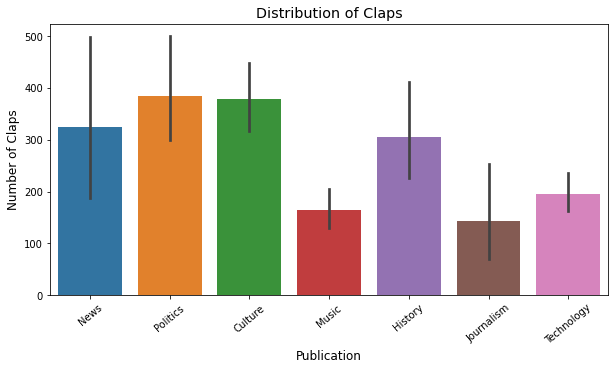

In [10]:
col = "Publication"
fig, axes = plt.subplots(figsize=(10, 5))
sb.barplot(x=col, y='Claps',data=df)
plt.xlabel(col, fontsize= 'large')
plt.xticks(rotation=40)
plt.ylabel('Number of Claps', fontsize= 'large')
plt.xlabel('Publication', fontsize= 'large')
plt.title("Distribution of Claps",fontsize='x-large')
plt.savefig('Claps_vs_Channel.eps')

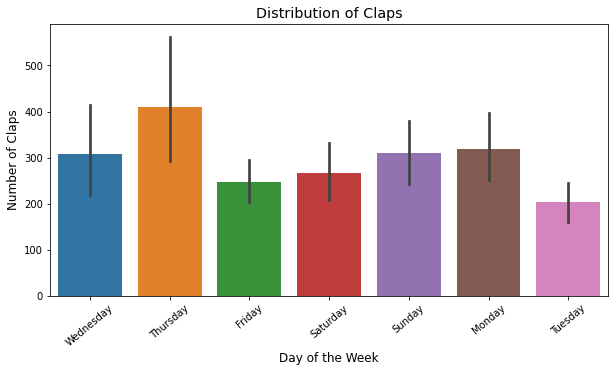

In [11]:
col = "Weekday"
fig, axes = plt.subplots(figsize=(10, 5))
sb.barplot(x=col, y='Claps',data=df)
plt.xlabel(col, fontsize= 'large')
plt.xticks(rotation=40)
plt.ylabel('Number of Claps', fontsize= 'large')
plt.xlabel('Day of the Week', fontsize= 'large')
plt.title("Distribution of Claps",fontsize='x-large')
plt.savefig('Claps_vs_Weekday.eps')

The above plots are in relation with the number of shares(self reference. now will proceed to plot the shares(last column/target variable) with day of the week.

In [12]:
dg= df.groupby('Publication').sum() #to get an idea of the data and to determine the order in which the age groups appear
print(dg['Claps'])

Publication
Culture       196190
History        84894
Journalism      5561
Music          27931
News           36738
Politics      211493
Technology    111303
Name: Claps, dtype: int64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

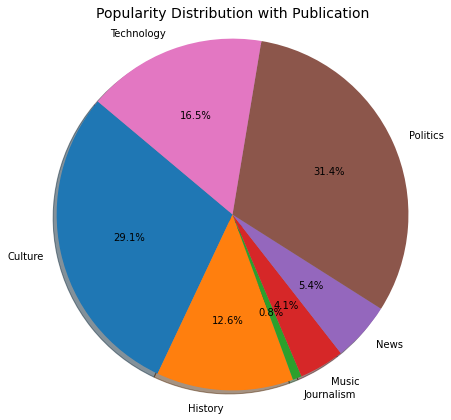

In [13]:
labels = 'Culture', 'History', 'Journalism','Music', 'News','Politics','Technology'
sizes = dg['Claps']
f, ax = plt.subplots(figsize=(7, 7))
ax= plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Popularity Distribution with Publication",fontsize=14)
plt.savefig('Popularity_vs_Publication.eps', format='eps')

# popularity vs channel vs weekend/weekday

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


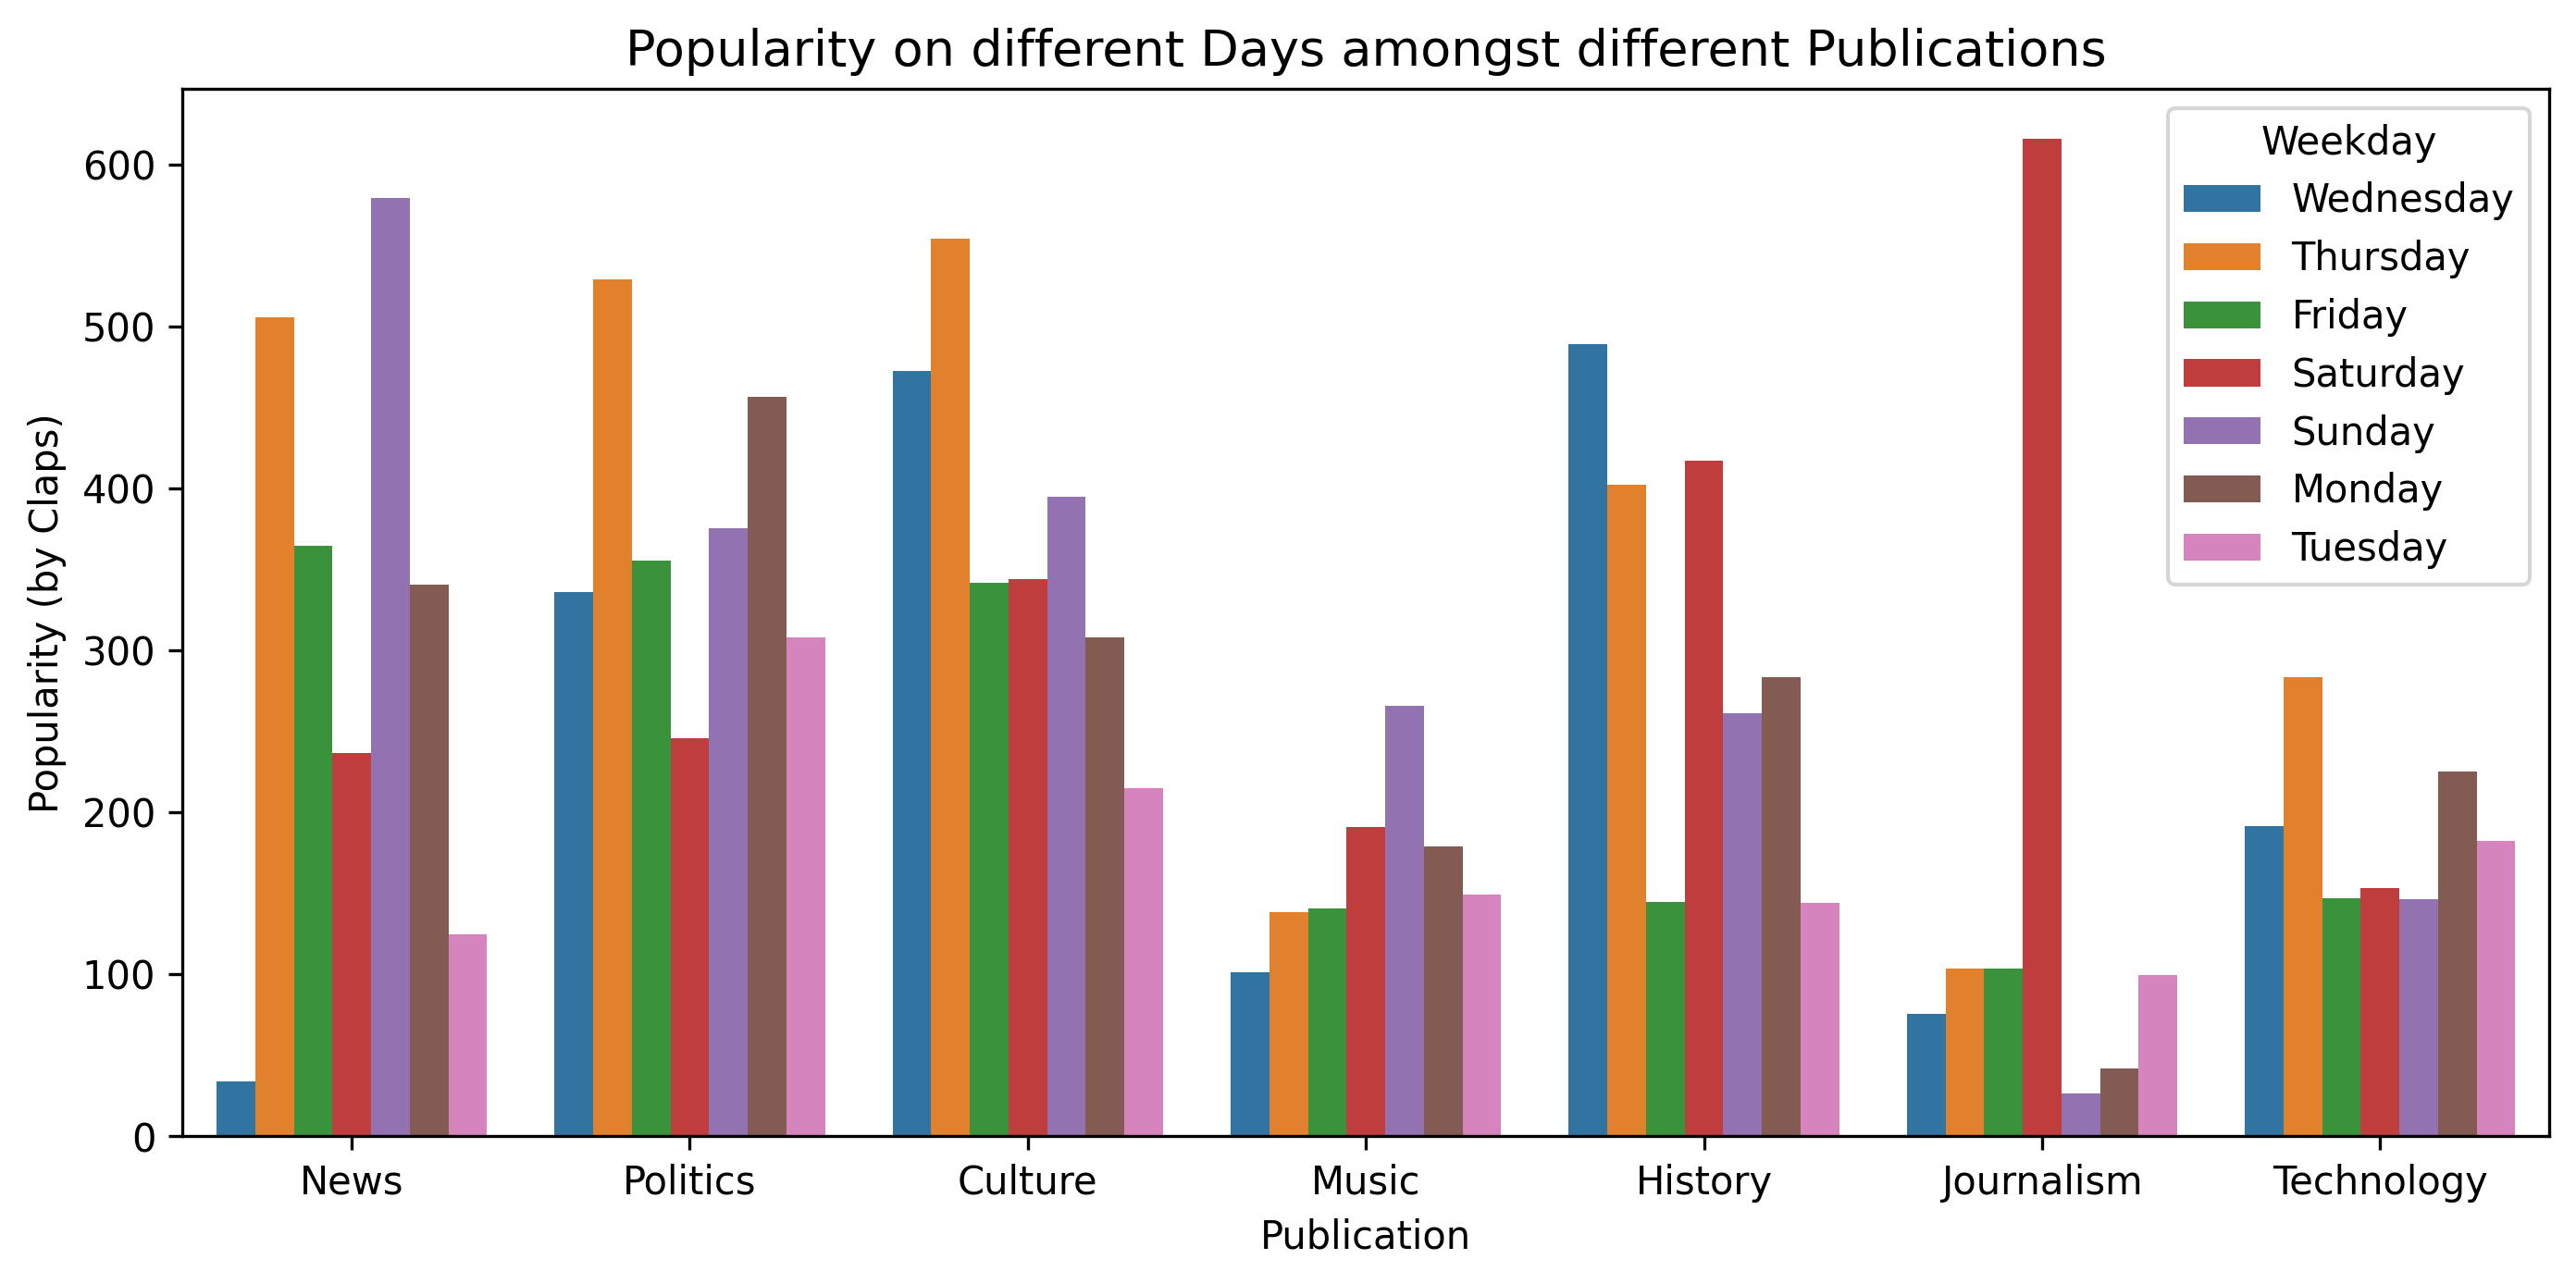

In [14]:

fig, ax = plt.subplots(figsize=(11,5), dpi=300)

sb.barplot(x='Publication', y='Claps',hue='Weekday',data=df,ax=ax, ci = None)
plt.ylabel('Popularity (by Claps)')
plt.title('Popularity on different Days amongst different Publications', fontsize=13, va='baseline')
plt.savefig('multihist.eps')

# Language vs Claps

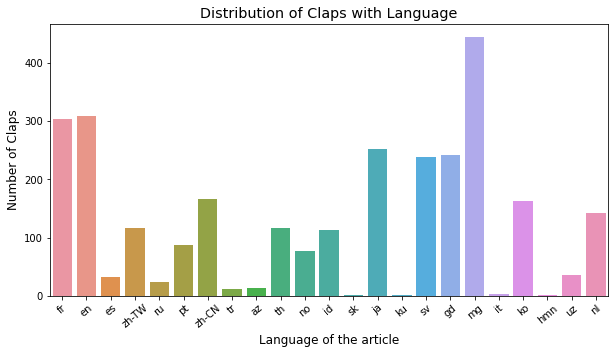

In [15]:
col = "Language"
df= df.replace({'Language': 1}, 'Monday')
fig, axes = plt.subplots(figsize=(10, 5))
sb.barplot(x=col, y='Claps',data=df, ci=None)
plt.xlabel(col, fontsize= 'large')
plt.xticks(rotation=40)
plt.ylabel('Number of Claps', fontsize= 'large')
plt.xlabel('Language of the article', fontsize= 'large')
plt.title("Distribution of Claps with Language",fontsize='x-large')
plt.savefig('Claps_vs_Language.eps')

# number of images used in each article type

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

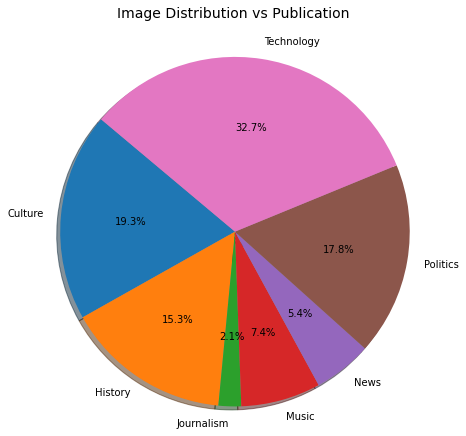

In [16]:
labels = 'Culture', 'History', 'Journalism','Music', 'News','Politics','Technology'
sizes = dg['Number of Images']
f, ax = plt.subplots(figsize=(7, 7))
ax= plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Image Distribution vs Publication \n",fontsize=14)
plt.savefig('Image_vs_Publication.eps')

# Find no. of articles grouped by popularity

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


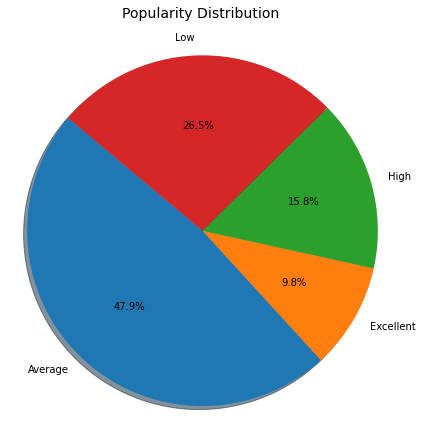

In [17]:
labels = 'Average', 'Excellent', 'High','Low'
sizes = [103,21,34,57]
f, ax = plt.subplots(figsize=(7, 7))
ax= plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Popularity Distribution \n",fontsize=14)
plt.savefig('Popularity_Pie.eps')

# Entropy calculation

In [18]:
import scipy.stats
import math 
# Finding the entropy
for col in df.columns.values:
  if ( col== "Language" or col== "Publication" ) :
      frequency=df.groupby([col])['Claps'].sum()
      N=frequency.sum()
      pro= frequency/N
      ent=-np.sum((frequency/N)*np.log(frequency/N))
      div= math.exp(ent)/N # this is just extra to measure diversity
      print (col),
      print (ent),
      print ("A measure of diversity is:(where 1 indicates perfectly diverse and 0 not diverse) -", div)
      print('\n')

Publication
1.6112921135652774
A measure of diversity is:(where 1 indicates perfectly diverse and 0 not diverse) - 7.4309528209421565e-06


Language
0.11171890163162007
A measure of diversity is:(where 1 indicates perfectly diverse and 0 not diverse) - 1.6587774883789521e-06




# Reading time vs Claps

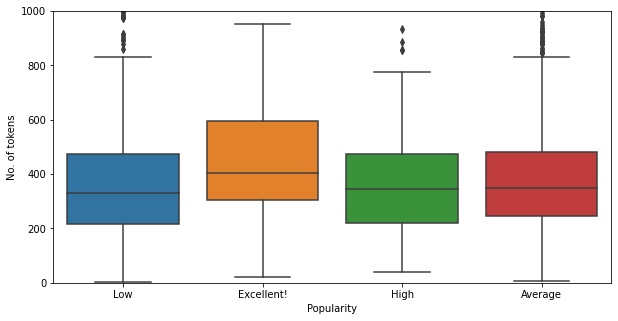

In [19]:
# line plot
temp_data = df[df['Claps'] <= 80000]
fig, axes = plt.subplots(figsize=(10,5))
# box plot
sb.boxplot(x='popularity', y='n_non_stop_unique_tokens', data=temp_data, ax=axes)
plt.ylim([0, 1000])
plt.xlabel('Popularity')
plt.ylabel('No. of tokens')
plt.savefig('Tokens_vs_Counts.eps')
# box plot of the dataset shows majority (75%) of the data inrespective of their shares is in the range of 0.6 - 0.8.
# So does it offers any uniques? No, it doesn't.

# Histogram of the tokens used in the content across various webpages

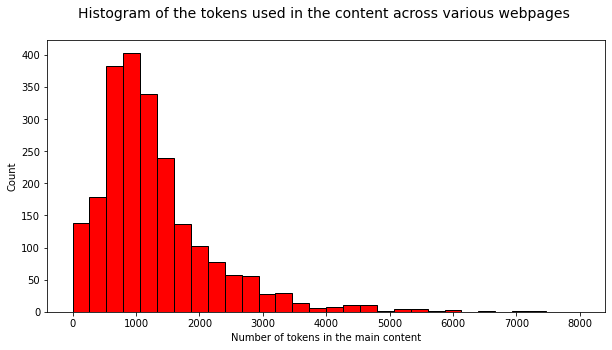

In [20]:
  fig, axes = plt.subplots(figsize=(10,5))
  plt.hist((df["n_tokens_content"]),histtype='bar',range=[0, 8000], color="red", edgecolor='black',bins=30)
  plt.xlabel("Number of tokens in the main content") 
  # show plot
  plt.title("Histogram of the tokens used in the content across various webpages \n",fontsize=14) 
  plt.ylabel('Count')
  plt.savefig('Tokens_hist.eps')

Hence, we can see the mode is around 1000 words in content of news articles.

# statistical analysis of the tokens
1. In title
2. In Content

In [21]:
from scipy.stats import skew
for col in df.columns.values:
  if (col=="n_tokens_title" or col=="n_tokens_content"):
   min=df[col].quantile([0.])
   max=df[col].quantile([1.])
   median=df[col].quantile([0.5])
   mean = df[col].mean()
   vari=np.var(df[col])
   print("This is the mean for ",col," : ",mean)
   print(" ")
   print("This is the variance for ",col," : ",vari)
   print(" ")
   print("This is the minimum value for ",col," : ",min[0])
   print(" ")
   print("This is the maximum value for ",col," : ",max[1])
   print(" ")
   print("This is the median value for ",col," : ",median[0.5])
   print( '\n25th percentile for ',col,' : ', (df[col].quantile([0.25]))[0.25])
   print( '\n75th percentile for ',col,' : ', (df[col].quantile([0.75]))[0.75])
   iqr= (df[col].quantile([0.75]))[0.75]-(df[col].quantile([0.25]))[0.25]
   print("\nInter Quartile Range for ",col," : ",iqr)
   print( '\nSkewness for ',col,' : ', skew(df[col])) 
   print("------------------------------------------------------")


This is the mean for  n_tokens_content  :  1298.6112600536194
 
This is the variance for  n_tokens_content  :  929740.8587114591
 
This is the minimum value for  n_tokens_content  :  3.0
 
This is the maximum value for  n_tokens_content  :  10120.0
 
This is the median value for  n_tokens_content  :  1073.0

25th percentile for  n_tokens_content  :  710.0

75th percentile for  n_tokens_content  :  1593.0

Inter Quartile Range for  n_tokens_content  :  883.0

Skewness for  n_tokens_content  :  2.4304125739577978
------------------------------------------------------
This is the mean for  n_tokens_title  :  7.340035746201966
 
This is the variance for  n_tokens_title  :  9.679281857524707
 
This is the minimum value for  n_tokens_title  :  1.0
 
This is the maximum value for  n_tokens_title  :  21.0
 
This is the median value for  n_tokens_title  :  7.0

25th percentile for  n_tokens_title  :  5.0

75th percentile for  n_tokens_title  :  9.0

Inter Quartile Range for  n_tokens_title  :  

# weekday  vs content_sentiment_polarity

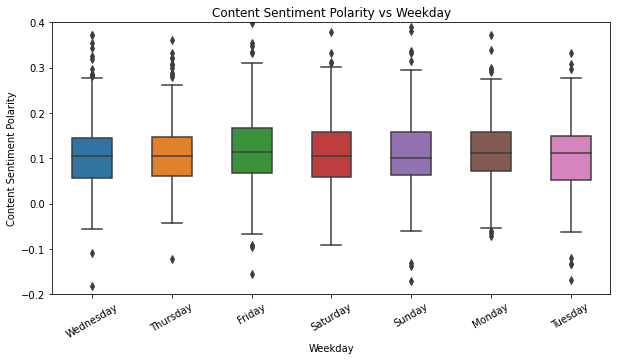

In [22]:
fig, axes = plt.subplots(figsize=(10,5))
sb.boxplot(x ='Weekday', y ='content_sentiment_polarity', data = df,width=0.5) 
plt.ylabel('Content Sentiment Polarity')
plt.xticks(rotation=30) 
plt.title('Content Sentiment Polarity vs Weekday')
plt.ylim([-0.2, 0.4])
plt.savefig('Polarity_vs_Weekday.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


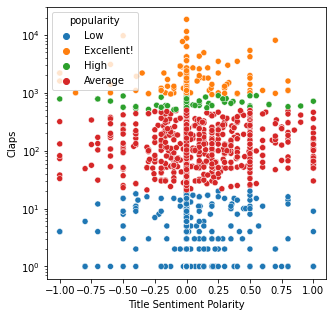

In [23]:
# attempt title_subjectivity
fig, axes = plt.subplots(figsize=(5,5))
axes.set(yscale="log")
sb.scatterplot(x='title_sentiment_polarity', y='Claps', hue='popularity', data=temp_data, ax=axes)
plt.xlabel('Title Sentiment Polarity')
plt.savefig('Claps_vs_Sentiment.eps')

# Distribution of unique tokens for each publication

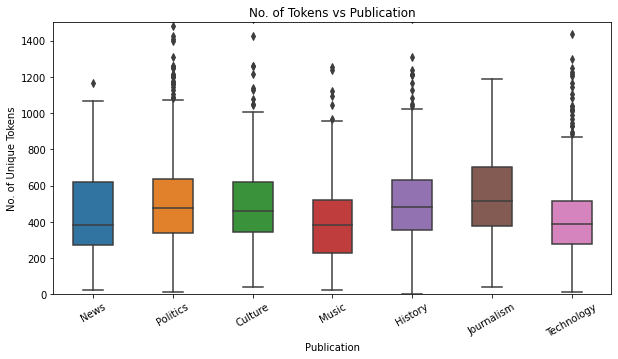

In [24]:
fig, axes = plt.subplots(figsize=(10,5))
sb.boxplot(data = df,x ='Publication', y ='n_unique_tokens',width=0.5) 
plt.ylabel('No. of Unique Tokens')
plt.xticks(rotation=30) 
plt.ylim([0, 1500])
plt.title('No. of Tokens vs Publication')
plt.savefig('Tokens_vs_Publication.eps')

# Polarity vs claps vs popularity

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


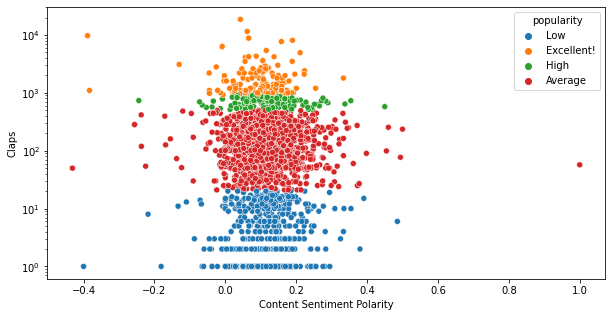

In [25]:
fig, axes = plt.subplots(figsize=(10,5))
temp_data = df[df['Claps'] <= 80000]
sb.scatterplot(x='content_sentiment_polarity', y='Claps', hue='popularity', data=temp_data, ax=axes)
axes.set(yscale="log")
plt.xlabel('Content Sentiment Polarity')
fig.savefig('Polarity_vs_Claps.eps')

# Heatmap of the dataset

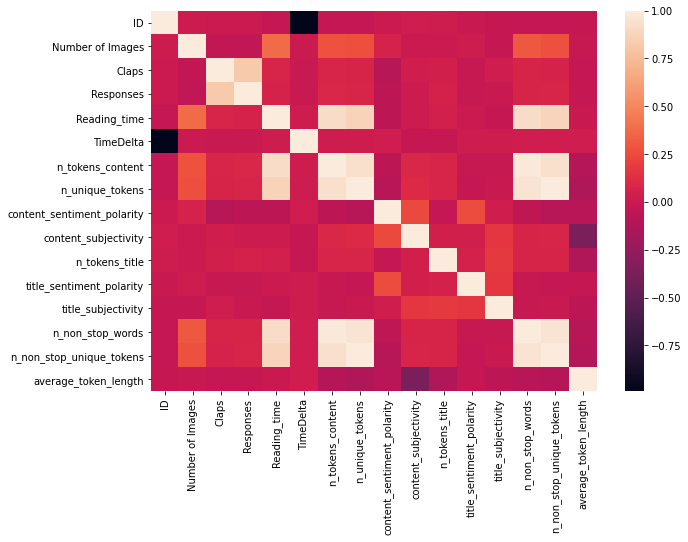

In [26]:
#df3=df.drop([' global_rate_positive_words',' rate_positive_words',' avg_positive_polarity',' max_positive_polarity',' min_negative_polarity'
              #,' title_subjectivity',' abs_title_subjectivity'],axis=1)


import seaborn as sns

# Create the correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr,annot=False)

   

# Can also save this as a png with
plt.savefig('Heatmap.eps')

# log likelihood



Have taken the log likelihood of number of images (and vids).

In [27]:
import math
import statsmodels.api as sm

n=len(df)
x_bar=df['Number of Images'].mean()
summ=df['Number of Images'].sum()
x=x_bar
sigma=math.sqrt(((df['Number of Images']-x)*(df['Number of Images']-x)).mean())
  
logL = -summ/(2*sigma*sigma) - n*np.log(2*math.pi)/2 -n*np.log(sigma)
print(" The log likelihood of the number of images is \n",logL)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 The log likelihood of the number of images is 
 -5556.699617859855
